# Example - 62 - Approach Trajectories for Two Probes at Neptune

In this example, we illustrate the approach trajectories for two probes, one equatorial and one polar delivered from a single approach trajectory at Neptune.

<font color='red'>**Note**:</font> This example requires Mayavi for visualization and requires the following packages to be to be installed in your virtual env: ```pyqt5```, ```vtk```, ```mayavi```.

<font color='red'>**Note**:</font> For the 3D viz, tt is recommended that you run this example by running the python file using: ```python example-62-two-probes-equatorial-polar.py``` from your virtual env terminal instead of this Jupyter Notebook. If you use this Jupyter Notebook, then you need to have the following additional packages installed ```ipywidgets``` and ```ipyevents```, and must do ```jupyter nbextension install --py mayavi --user``` before you start the notebook.

In [1]:
from mayavi import mlab
mlab.init_notebook(backend='ipy')

import numpy as np

from AMAT.approach import Approach

Notebook initialized with ipy backend.


## Make two probes with psi = pi [polar] and psi  = 3pi/2 [equatorial, prograde]

In [2]:
probe1 = Approach("NEPTUNE",
                    v_inf_vec_icrf_kms=np.array([17.78952518, 8.62038536, 3.15801163]),
                    rp=(24764 + 400) * 1e3, psi=np.pi,
                    is_entrySystem=True, h_EI=1000e3)


probe2 = Approach("NEPTUNE",
                    v_inf_vec_icrf_kms=np.array([17.78952518, 8.62038536, 3.15801163]),
                    rp=(24764 + 400) * 1e3, psi=3* np.pi/2,
                    is_entrySystem=True, h_EI=1000e3)

theta_star_arr_probe1 = np.linspace(-1.8, probe1.theta_star_entry, 101)
pos_vec_bi_arr_probe1 = probe1.pos_vec_bi(theta_star_arr_probe1)/24764e3


theta_star_arr_probe2 = np.linspace(-1.8, probe2.theta_star_entry, 101)
pos_vec_bi_arr_probe2 = probe2.pos_vec_bi(theta_star_arr_probe2)/24764e3

x_arr_probe1 = pos_vec_bi_arr_probe1[0][:]
y_arr_probe1 = pos_vec_bi_arr_probe1[1][:]
z_arr_probe1 = pos_vec_bi_arr_probe1[2][:]

x_arr_probe2 = pos_vec_bi_arr_probe2[0][:]
y_arr_probe2 = pos_vec_bi_arr_probe2[1][:]
z_arr_probe2 = pos_vec_bi_arr_probe2[2][:]


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1*np.outer(np.cos(u), np.sin(v))
y = 1*np.outer(np.sin(u), np.sin(v))
z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.040381198513972*np.outer(np.cos(u), np.sin(v))
y1 = 1.040381198513972*np.outer(np.sin(u), np.sin(v))
z1 = 1.040381198513972*np.outer(np.ones(np.size(u)), np.cos(v))


x_ring_1 = 1.1*np.cos(u)
y_ring_1 = 1.1*np.sin(u)
z_ring_1 = 0.0*np.cos(u)

x_ring_2 = 1.2*np.cos(u)
y_ring_2 = 1.2*np.sin(u)
z_ring_2 = 0.0*np.cos(u)

mlab.figure(bgcolor=(0,0,0), size=(1200,800))
s1 = mlab.mesh(x, y, z, color=(0,0,1))
s2 = mlab.mesh(x1, y1, z1, color=(0,0,1), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1,1,1), line_width=1, tube_radius=None)
r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1,1,1), line_width=1, tube_radius=None)

p1 = mlab.plot3d(x_arr_probe1, y_arr_probe1, z_arr_probe1, color=(1,0,0), line_width=3, tube_radius=None)
p2 = mlab.plot3d(x_arr_probe2, y_arr_probe2, z_arr_probe2, color=(0,1,0), line_width=3, tube_radius=None)


mlab.show()
# uncomment the line below if running the Jupyter Notebook
# p2 

## Plot the approach trajectories of both probes

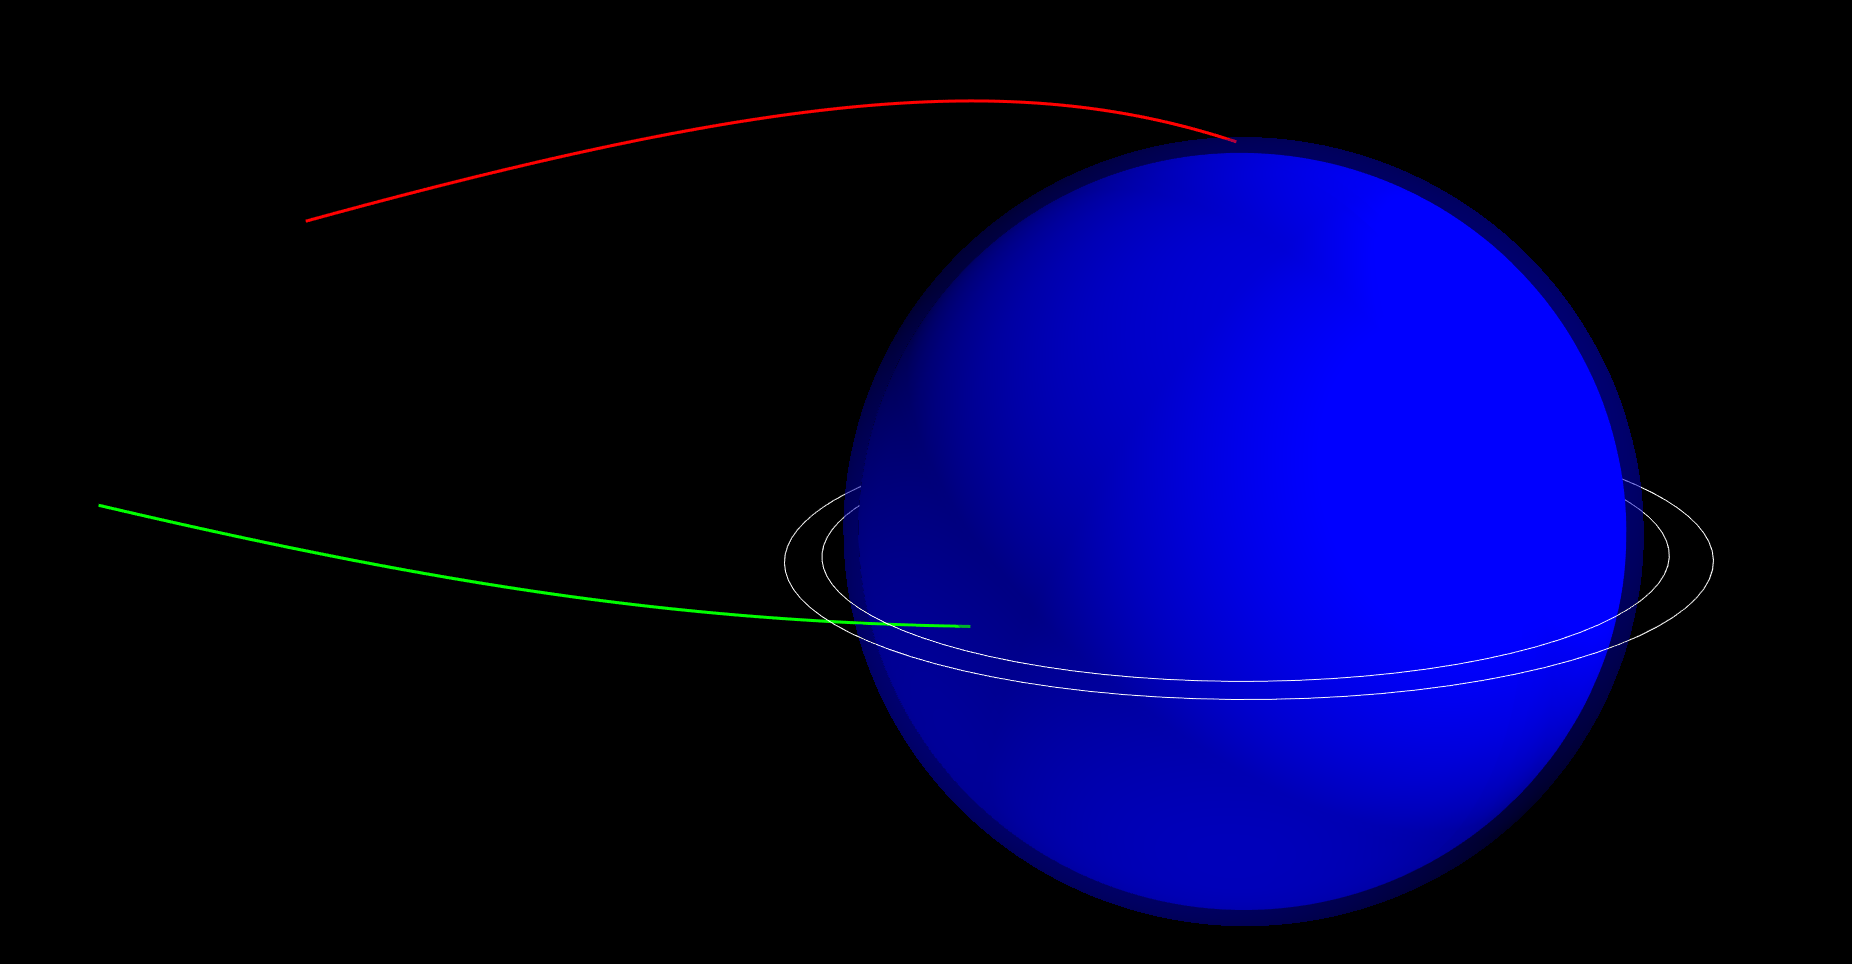

In [3]:
from IPython.display import Image
Image(filename="../plots/example-62-equatorial-polar-probe-two-probes.png", width=800)

## Compute the atmosphere-relative entry conditions for both probes

### Polar probe

In [4]:
print("Entry altitude, km: "+ str(probe1.h_EI/1e3))
print("Entry longitude BI, km: "+ str(round(probe1.longitude_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(probe1.latitude_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(probe1.v_entry_atm_mag/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(probe1.heading_entry_atm*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(probe1.gamma_entry_atm*180/np.pi, 4)))

Entry altitude, km: 1000.0
Entry longitude BI, km: 4.25
Entry latitude BI, deg: 87.79
Atm. relative entry speed, km/s: 30.5681
Atm. relative heading angle, deg: 90.2007
Atm. relative EFPA, deg: -9.1713


### Equatorial probe

In [5]:
print("Entry altitude, km: "+ str(probe2.h_EI/1e3))
print("Entry longitude BI, km: "+ str(round(probe2.longitude_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(probe2.latitude_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(probe2.v_entry_atm_mag/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(probe2.heading_entry_atm*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(probe2.gamma_entry_atm*180/np.pi, 4)))

Entry altitude, km: 1000.0
Entry longitude BI, km: -74.91
Entry latitude BI, deg: 1.66
Atm. relative entry speed, km/s: 27.866
Atm. relative heading angle, deg: 13.7856
Atm. relative EFPA, deg: -10.0695
